In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
walk_accel_data = pd.read_csv('walk/Accelerometer.csv')
walk_gyro_data = pd.read_csv('walk/Gyroscope.csv')

run_accel_data = pd.read_csv('run/Accelerometer.csv')
run_gyro_data = pd.read_csv('run/Gyroscope.csv')

squat_accel_data = pd.read_csv('squat/Accelerometer.csv')
squat_gyro_data = pd.read_csv('squat/Gyroscope.csv')


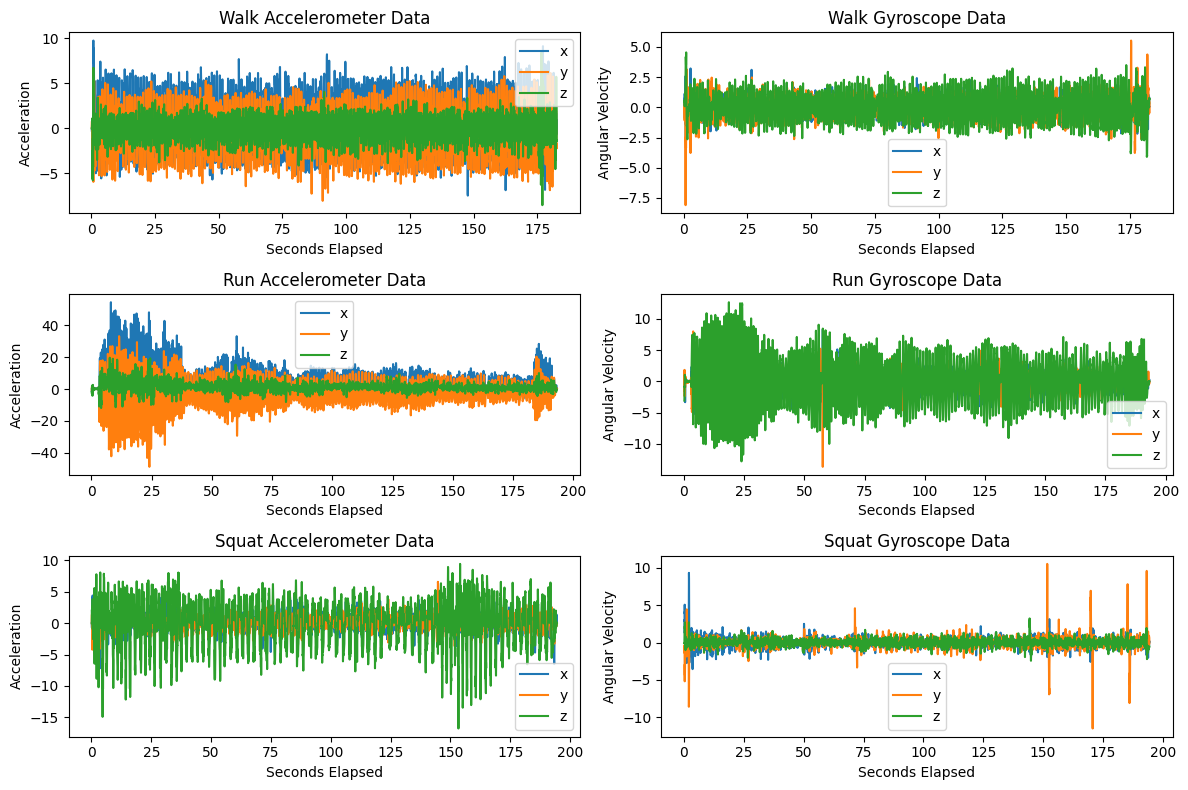

In [11]:
plt.figure(figsize=(12, 8))

# Графіки для ходьби
plt.subplot(3, 2, 1)
plt.plot(walk_accel_data['seconds_elapsed'], walk_accel_data['x'], label='x')
plt.plot(walk_accel_data['seconds_elapsed'], walk_accel_data['y'], label='y')
plt.plot(walk_accel_data['seconds_elapsed'], walk_accel_data['z'], label='z')
plt.title('Walk Accelerometer Data')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Acceleration')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(walk_gyro_data['seconds_elapsed'], walk_gyro_data['x'], label='x')
plt.plot(walk_gyro_data['seconds_elapsed'], walk_gyro_data['y'], label='y')
plt.plot(walk_gyro_data['seconds_elapsed'], walk_gyro_data['z'], label='z')
plt.title('Walk Gyroscope Data')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Angular Velocity')
plt.legend()

# Графіки для бігу
plt.subplot(3, 2, 3)
plt.plot(run_accel_data['seconds_elapsed'], run_accel_data['x'], label='x')
plt.plot(run_accel_data['seconds_elapsed'], run_accel_data['y'], label='y')
plt.plot(run_accel_data['seconds_elapsed'], run_accel_data['z'], label='z')
plt.title('Run Accelerometer Data')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Acceleration')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(run_gyro_data['seconds_elapsed'], run_gyro_data['x'], label='x')
plt.plot(run_gyro_data['seconds_elapsed'], run_gyro_data['y'], label='y')
plt.plot(run_gyro_data['seconds_elapsed'], run_gyro_data['z'], label='z')
plt.title('Run Gyroscope Data')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Angular Velocity')
plt.legend()

# Графіки для присідання
plt.subplot(3, 2, 5)
plt.plot(squat_accel_data['seconds_elapsed'], squat_accel_data['x'], label='x')
plt.plot(squat_accel_data['seconds_elapsed'], squat_accel_data['y'], label='y')
plt.plot(squat_accel_data['seconds_elapsed'], squat_accel_data['z'], label='z')
plt.title('Squat Accelerometer Data')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Acceleration')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(squat_gyro_data['seconds_elapsed'], squat_gyro_data['x'], label='x')
plt.plot(squat_gyro_data['seconds_elapsed'], squat_gyro_data['y'], label='y')
plt.plot(squat_gyro_data['seconds_elapsed'], squat_gyro_data['z'], label='z')
plt.title('Squat Gyroscope Data')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Angular Velocity')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
def analyze_frequency_stability(data):
    time_diff = data['seconds_elapsed'].diff()
    mean_time_diff = time_diff.mean()
    expected_frequency = 1 / 30
    
    print("Mean time:", mean_time_diff)
    print("Expected time for 30 Hz:", expected_frequency)
    
    if abs(mean_time_diff - expected_frequency) < 0.001:
        print("Frequency is stable.")
    else:
        print("Frequency is unstable.")

# Аналіз стабільності частоти для даних з акселерометра
print("Axel:")
analyze_frequency_stability(walk_accel_data)
analyze_frequency_stability(run_accel_data)
analyze_frequency_stability(squat_accel_data)

# Аналіз стабільності частоти для даних з гіроскопа
print("\nGyro:")
analyze_frequency_stability(walk_gyro_data)
analyze_frequency_stability(run_gyro_data)
analyze_frequency_stability(squat_gyro_data)

Axel:
Mean time: 0.057885462162078384
Expected time for 30 Hz: 0.03333333333333333
Frequency is unstable.
Mean time: 0.05790553888733971
Expected time for 30 Hz: 0.03333333333333333
Frequency is unstable.
Mean time: 0.05790632495226341
Expected time for 30 Hz: 0.03333333333333333
Frequency is unstable.

Gyro:
Mean time: 0.033332969071355106
Expected time for 30 Hz: 0.03333333333333333
Frequency is stable.
Mean time: 0.03333296848528952
Expected time for 30 Hz: 0.03333333333333333
Frequency is stable.
Mean time: 0.03333296860254375
Expected time for 30 Hz: 0.03333333333333333
Frequency is stable.


In [22]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers
walk_accel_outliers = detect_outliers(walk_accel_data[['x', 'y', 'z']])
walk_gyro_outliers = detect_outliers(walk_gyro_data[['x', 'y', 'z']])
run_accel_outliers = detect_outliers(run_accel_data[['x', 'y', 'z']])
run_gyro_outliers = detect_outliers(run_gyro_data[['x', 'y', 'z']])
squat_accel_outliers = detect_outliers(squat_accel_data[['x', 'y', 'z']])
squat_gyro_outliers = detect_outliers(squat_gyro_data[['x', 'y', 'z']])
print("Walk Accelerometer Outliers:")
print(walk_accel_outliers.any())
print("\nWalk Gyroscope Outliers:")
print(walk_gyro_outliers.any())

print("\nRun Accelerometer Outliers:")
print(run_accel_outliers.any())
print("\nRun Gyroscope Outliers:")
print(run_gyro_outliers.any())

print("\nSquat Accelerometer Outliers:")
print(squat_accel_outliers.any())
print("\nSquat Gyroscope Outliers:")
print(squat_gyro_outliers.any())

Walk Accelerometer Outliers:
x    False
y     True
z     True
dtype: bool

Walk Gyroscope Outliers:
x    True
y    True
z    True
dtype: bool

Run Accelerometer Outliers:
x    True
y    True
z    True
dtype: bool

Run Gyroscope Outliers:
x     True
y     True
z    False
dtype: bool

Squat Accelerometer Outliers:
x    True
y    True
z    True
dtype: bool

Squat Gyroscope Outliers:
x    True
y    True
z    True
dtype: bool


In [14]:
N = 60  # 2 секунди * 30 Гц

# Функція для поділу даних на вікна
def split_data_into_windows(data, window_size):
    windows = []
    for i in range(0, len(data), window_size):
        window = data.iloc[i:i+window_size]
        if len(window) == window_size:
            windows.append(window)
    return windows

# Поділ даних акселерометра на вікна
walk_accel_windows = split_data_into_windows(walk_accel_data, N)
run_accel_windows = split_data_into_windows(run_accel_data, N)
squat_accel_windows = split_data_into_windows(squat_accel_data, N)

# Поділ даних гіроскопа на вікна
walk_gyro_windows = split_data_into_windows(walk_gyro_data, N)
run_gyro_windows = split_data_into_windows(run_gyro_data, N)
squat_gyro_windows = split_data_into_windows(squat_gyro_data, N)

In [15]:
def calculate_statistics(window):
    statistics = {}
    for axis in ['x', 'y', 'z']:
        axis_data = window[axis]
        statistics[f'mean_{axis}'] = np.mean(axis_data)
        statistics[f'std_{axis}'] = np.std(axis_data)
        statistics[f'min_{axis}'] = np.min(axis_data)
        statistics[f'max_{axis}'] = np.max(axis_data)
        statistics[f'range_{axis}'] = np.max(axis_data) - np.min(axis_data)
    return statistics

def calculate_window_statistics(window_list):
    statistics_list = []
    for window in window_list:
        window_statistics = calculate_statistics(window)
        statistics_list.append(window_statistics)
    return pd.DataFrame(statistics_list)

# Для кожного типу активності
walk_accel_statistics = calculate_window_statistics(walk_accel_windows)
run_accel_statistics = calculate_window_statistics(run_accel_windows)
squat_accel_statistics = calculate_window_statistics(squat_accel_windows)

walk_gyro_statistics = calculate_window_statistics(walk_gyro_windows)
run_gyro_statistics = calculate_window_statistics(run_gyro_windows)
squat_gyro_statistics = calculate_window_statistics(squat_gyro_windows)


In [16]:
walk_accel_statistics.head()


,mean_x,std_x,min_x,max_x,range_x,mean_y,std_y,min_y,max_y,range_y,mean_z,std_z,min_z,max_z,range_z
0,0.914471,3.730912,-5.029666,9.765373,14.795039,-0.660757,2.587660,-5.949846,5.311660,11.261506,-0.222724,2.094345,-5.769606,6.739097,12.508703
1,0.007590,3.413341,-5.562823,6.542995,12.105819,-0.556630,2.658296,-5.309528,5.056741,10.366270,0.169768,1.227955,-3.168121,2.661332,5.829453
2,0.209495,2.982083,-4.585035,6.536618,11.121653,-0.623583,2.751613,-5.820576,4.462631,10.283207,-0.294416,1.076946,-2.432155,1.691382,4.123538
3,0.005457,3.254634,-5.392595,6.566665,11.959260,0.024325,2.117429,-4.596574,4.069195,8.665769,-0.011773,1.081024,-2.806406,2.268930,5.075336
4,0.449572,2.979289,-4.007498,6.478478,10.485977,-0.174775,2.215445,-4.914229,3.744921,8.659150,-0.076026,1.050077,-2.611000,1.724820,4.335819


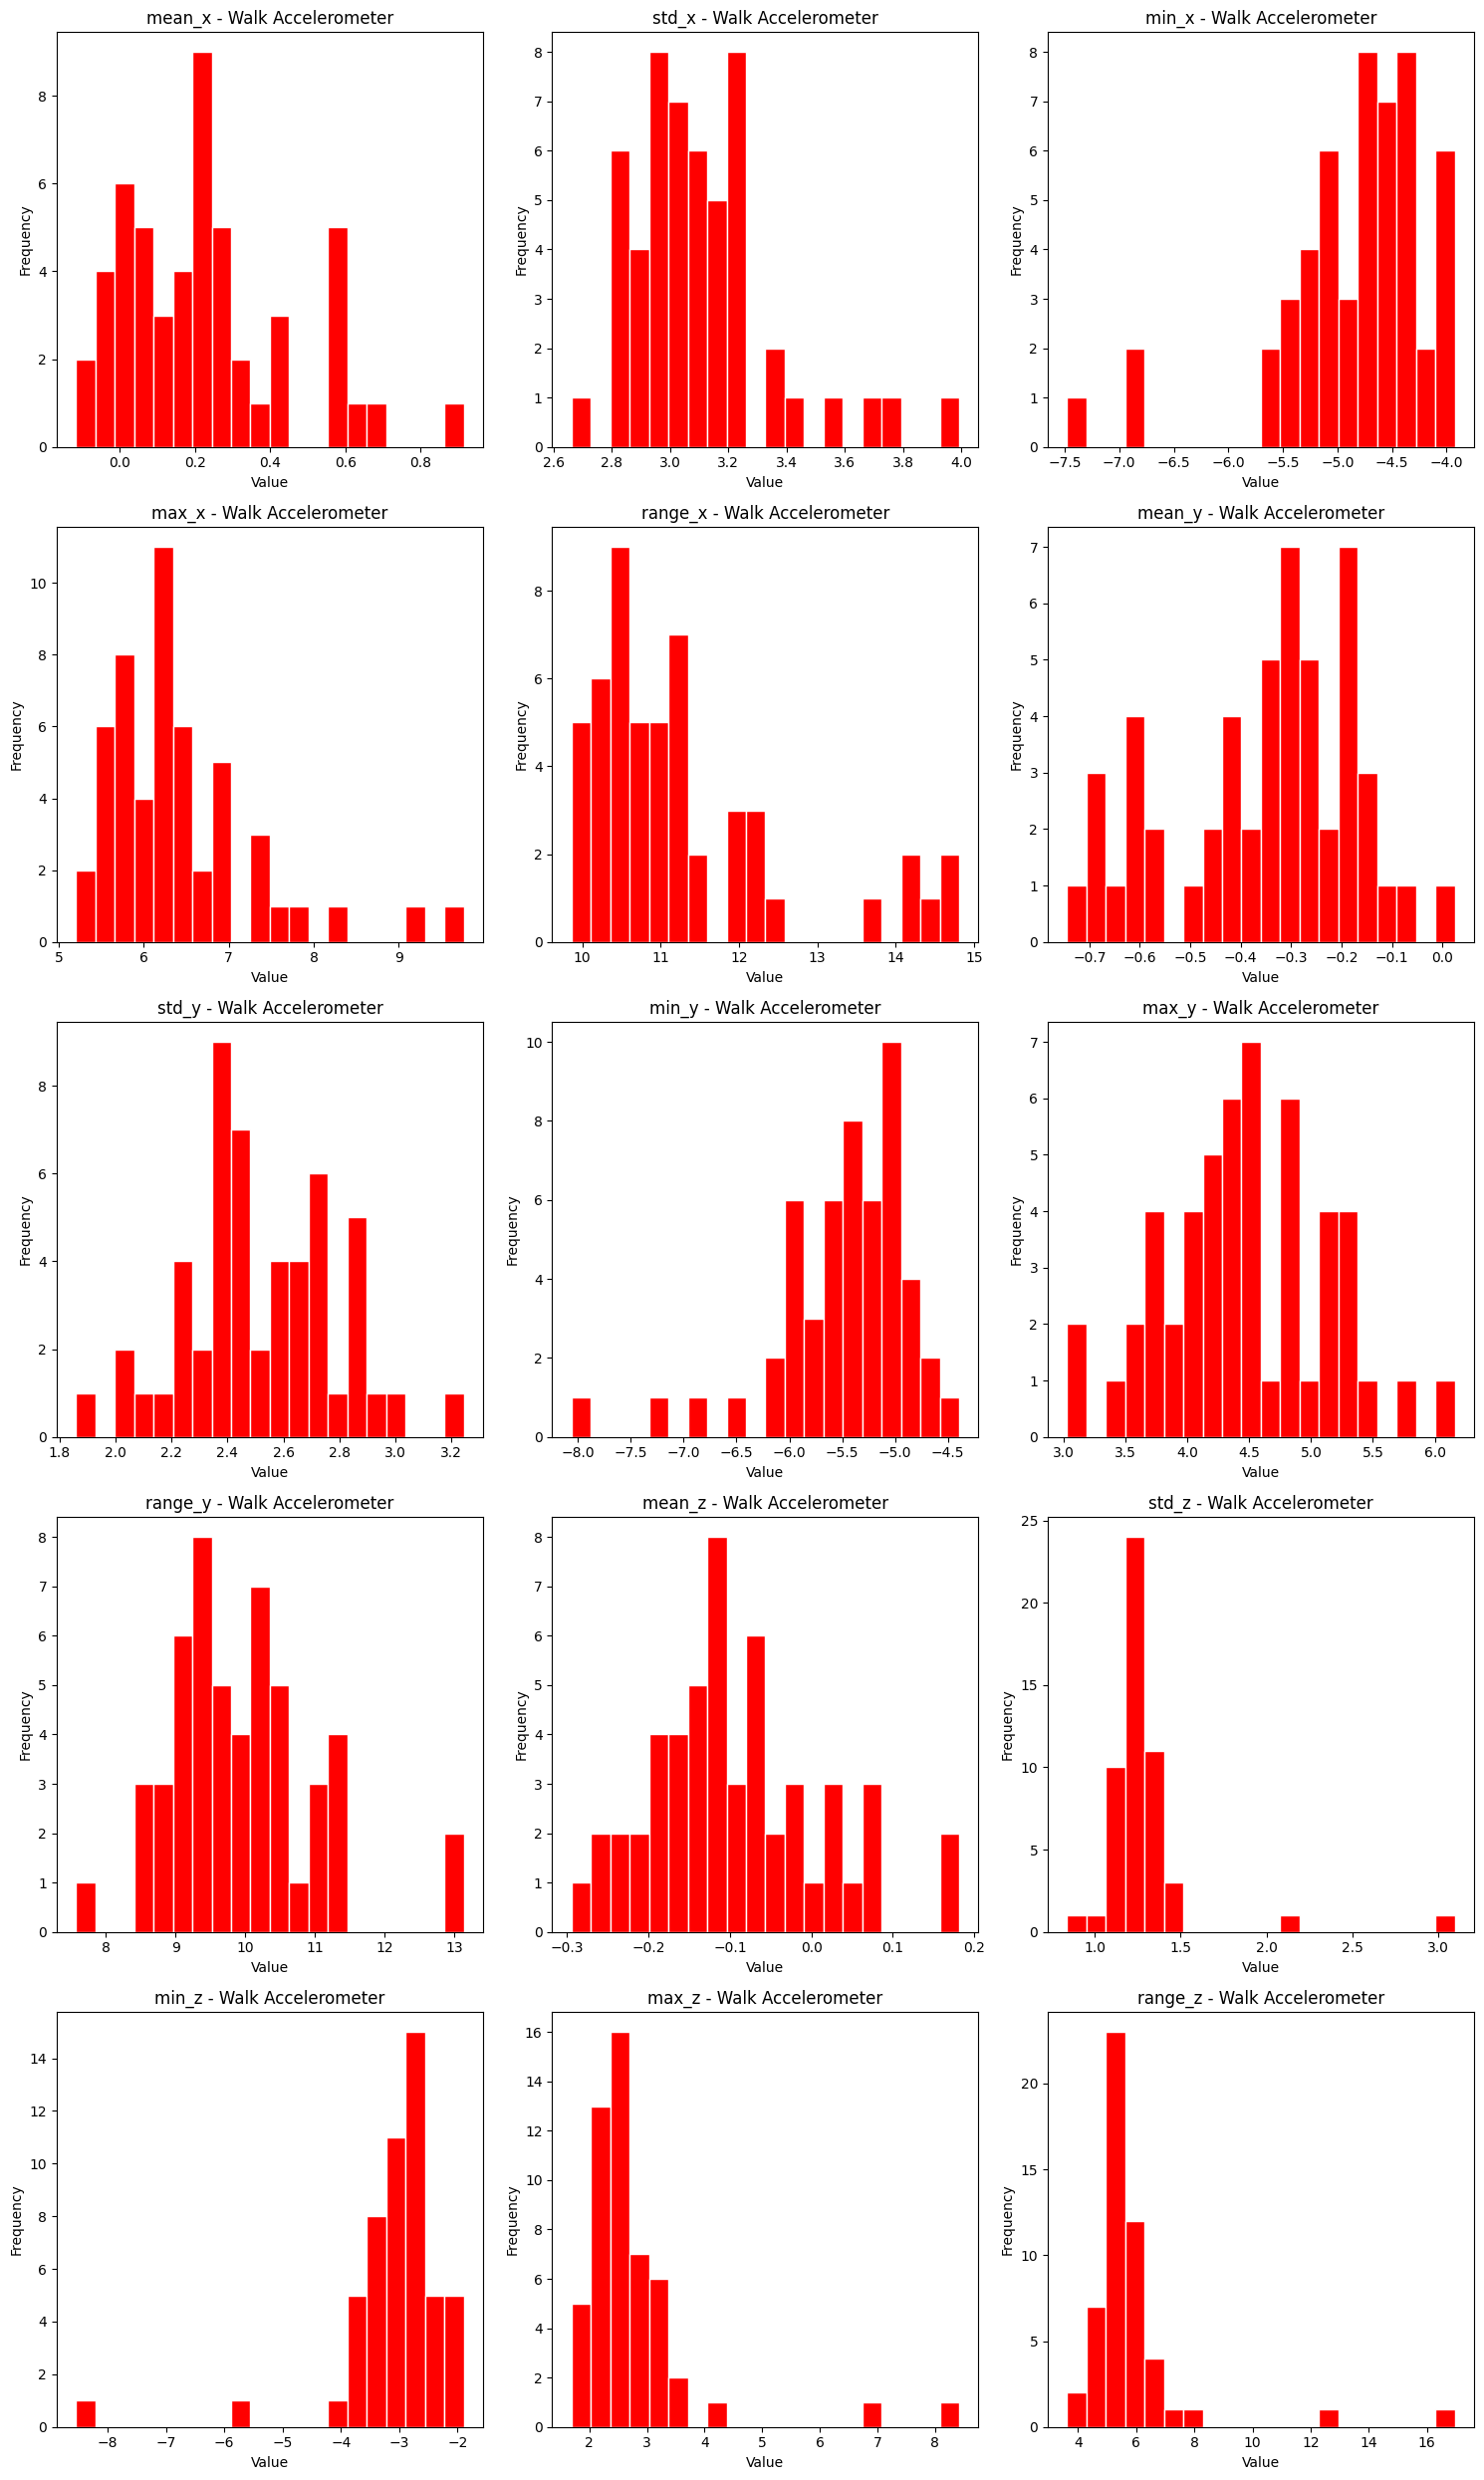

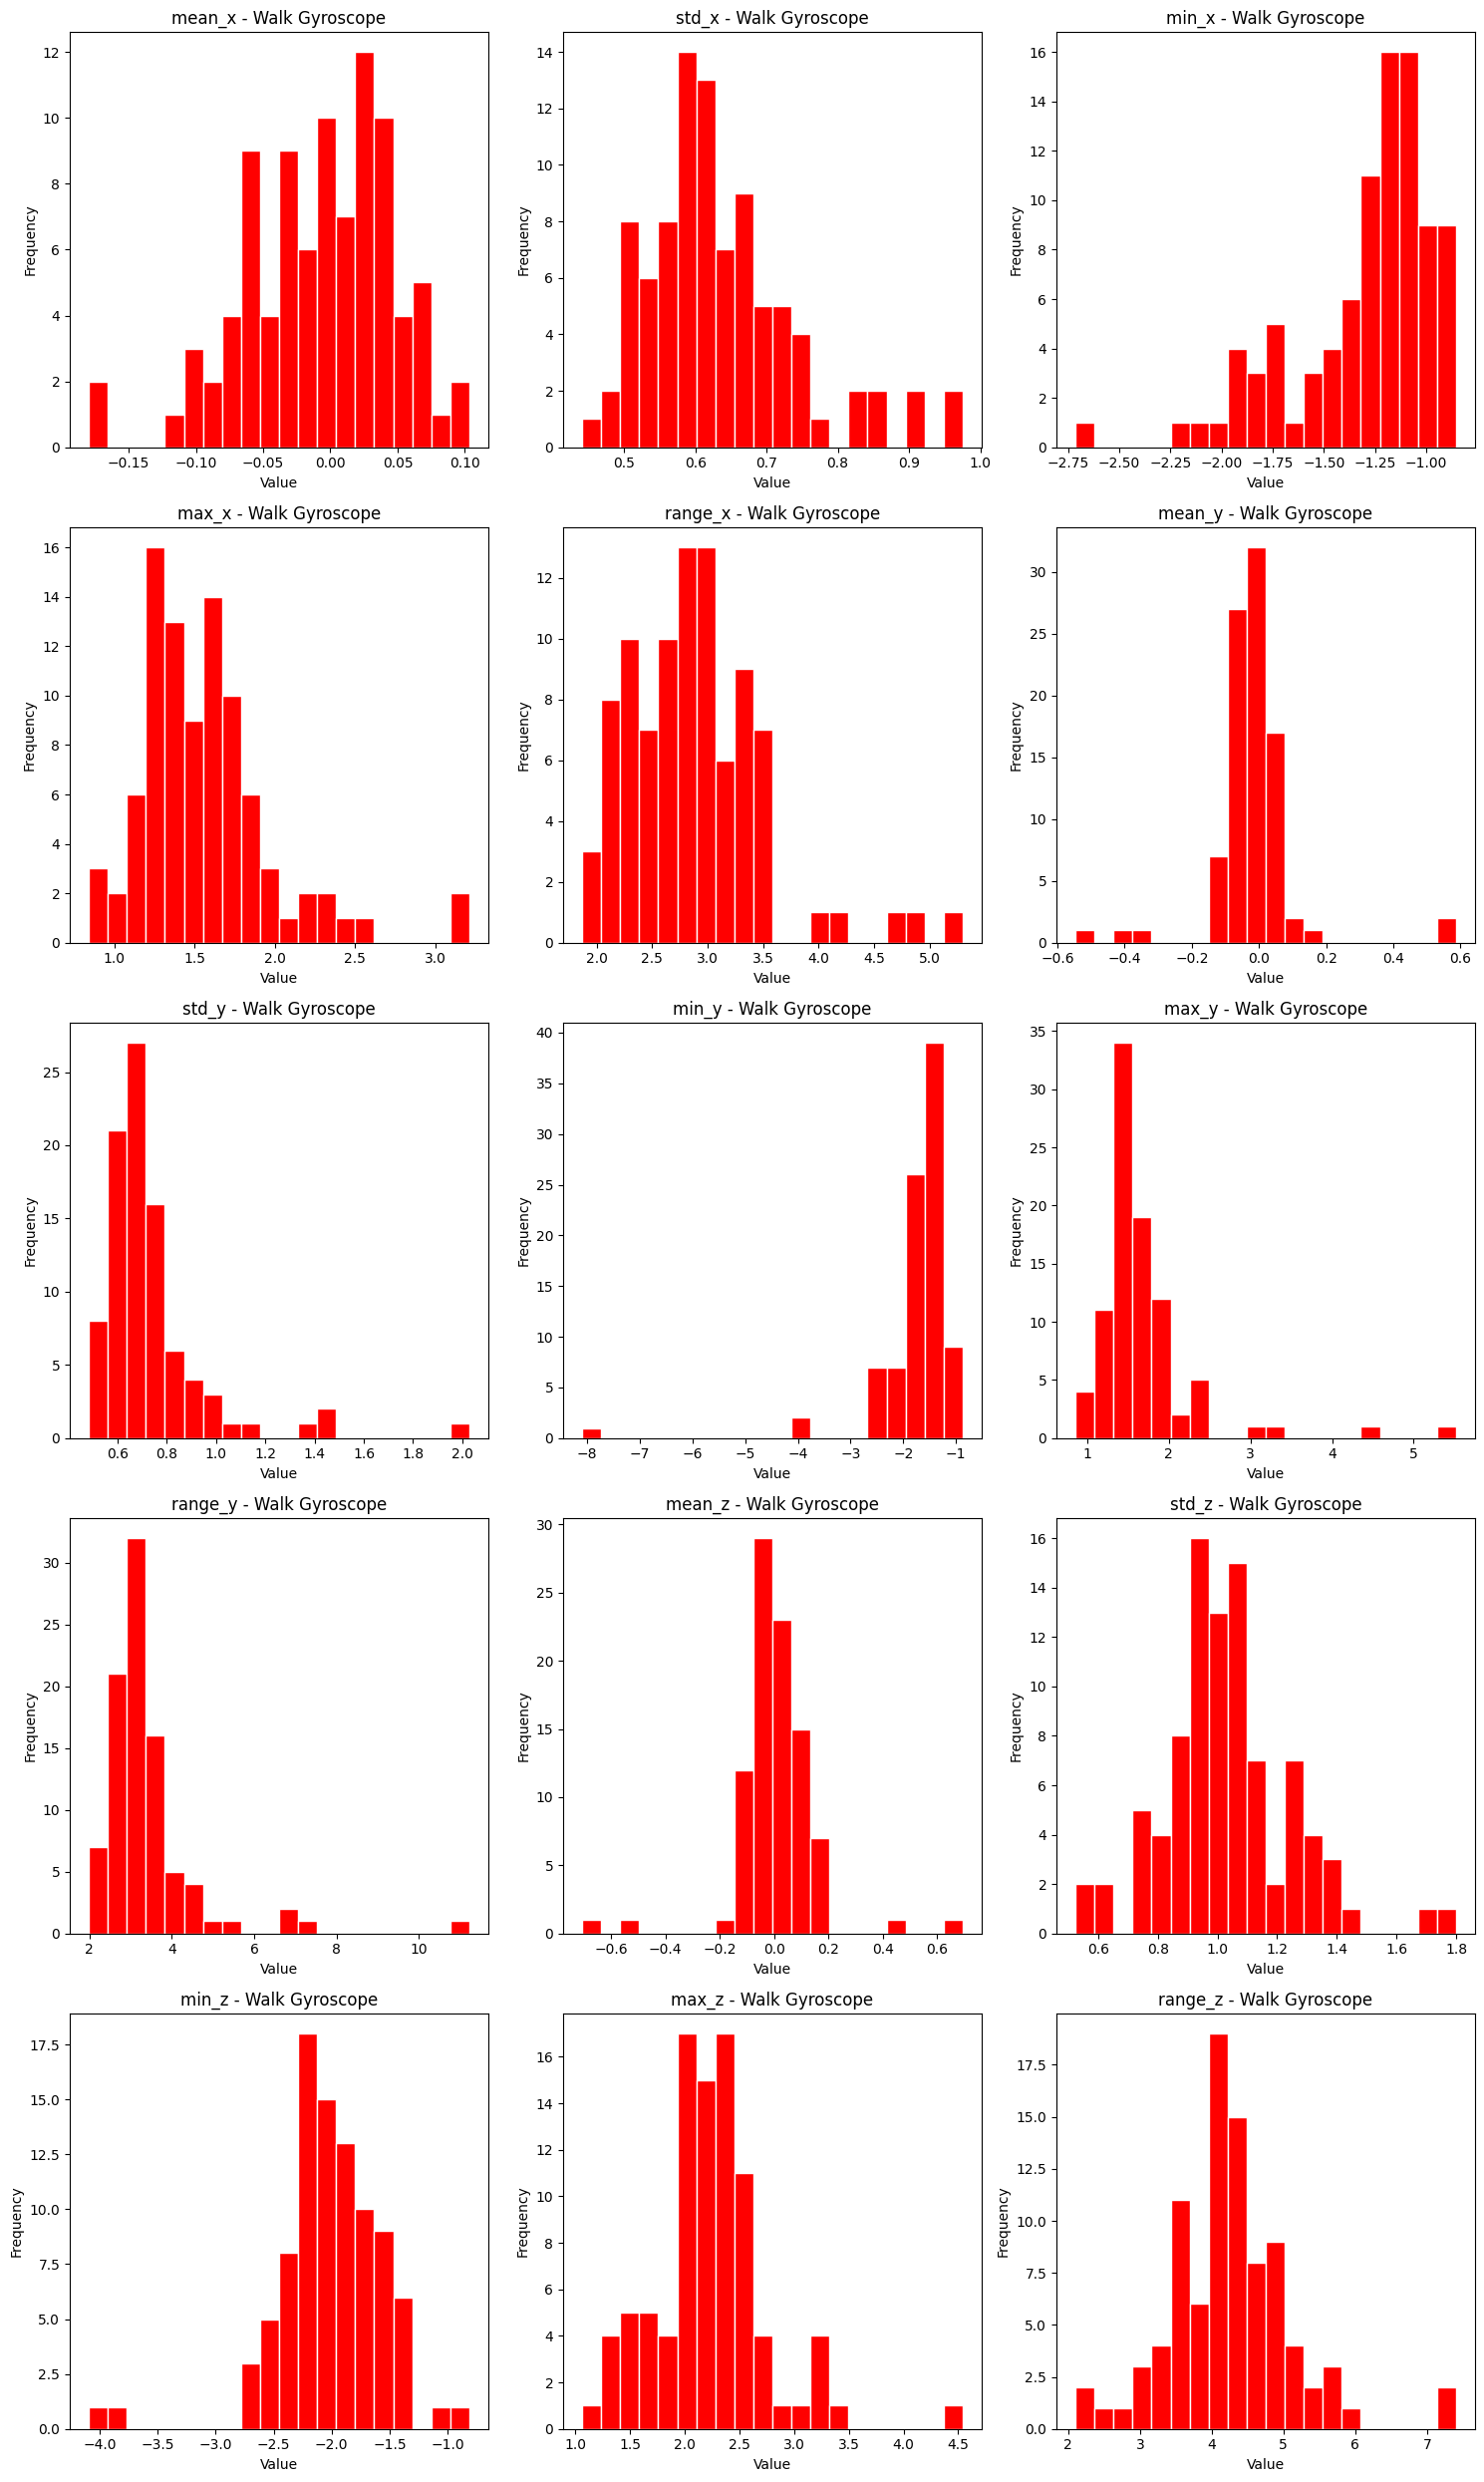

In [19]:
def plot_histograms(data, activity_name):
    num_variables = len(data.columns)
    num_rows = (num_variables // 3) + min(1, num_variables % 3)
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
    for i, (column, ax) in enumerate(zip(data.columns, axes.flatten())):
        ax.hist(data[column], bins=20, color='red', edgecolor='white')
        ax.set_title(f'{column} - {activity_name}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Ходьба
plot_histograms(walk_accel_statistics, "Walk Accelerometer")
plot_histograms(walk_gyro_statistics, "Walk Gyroscope")


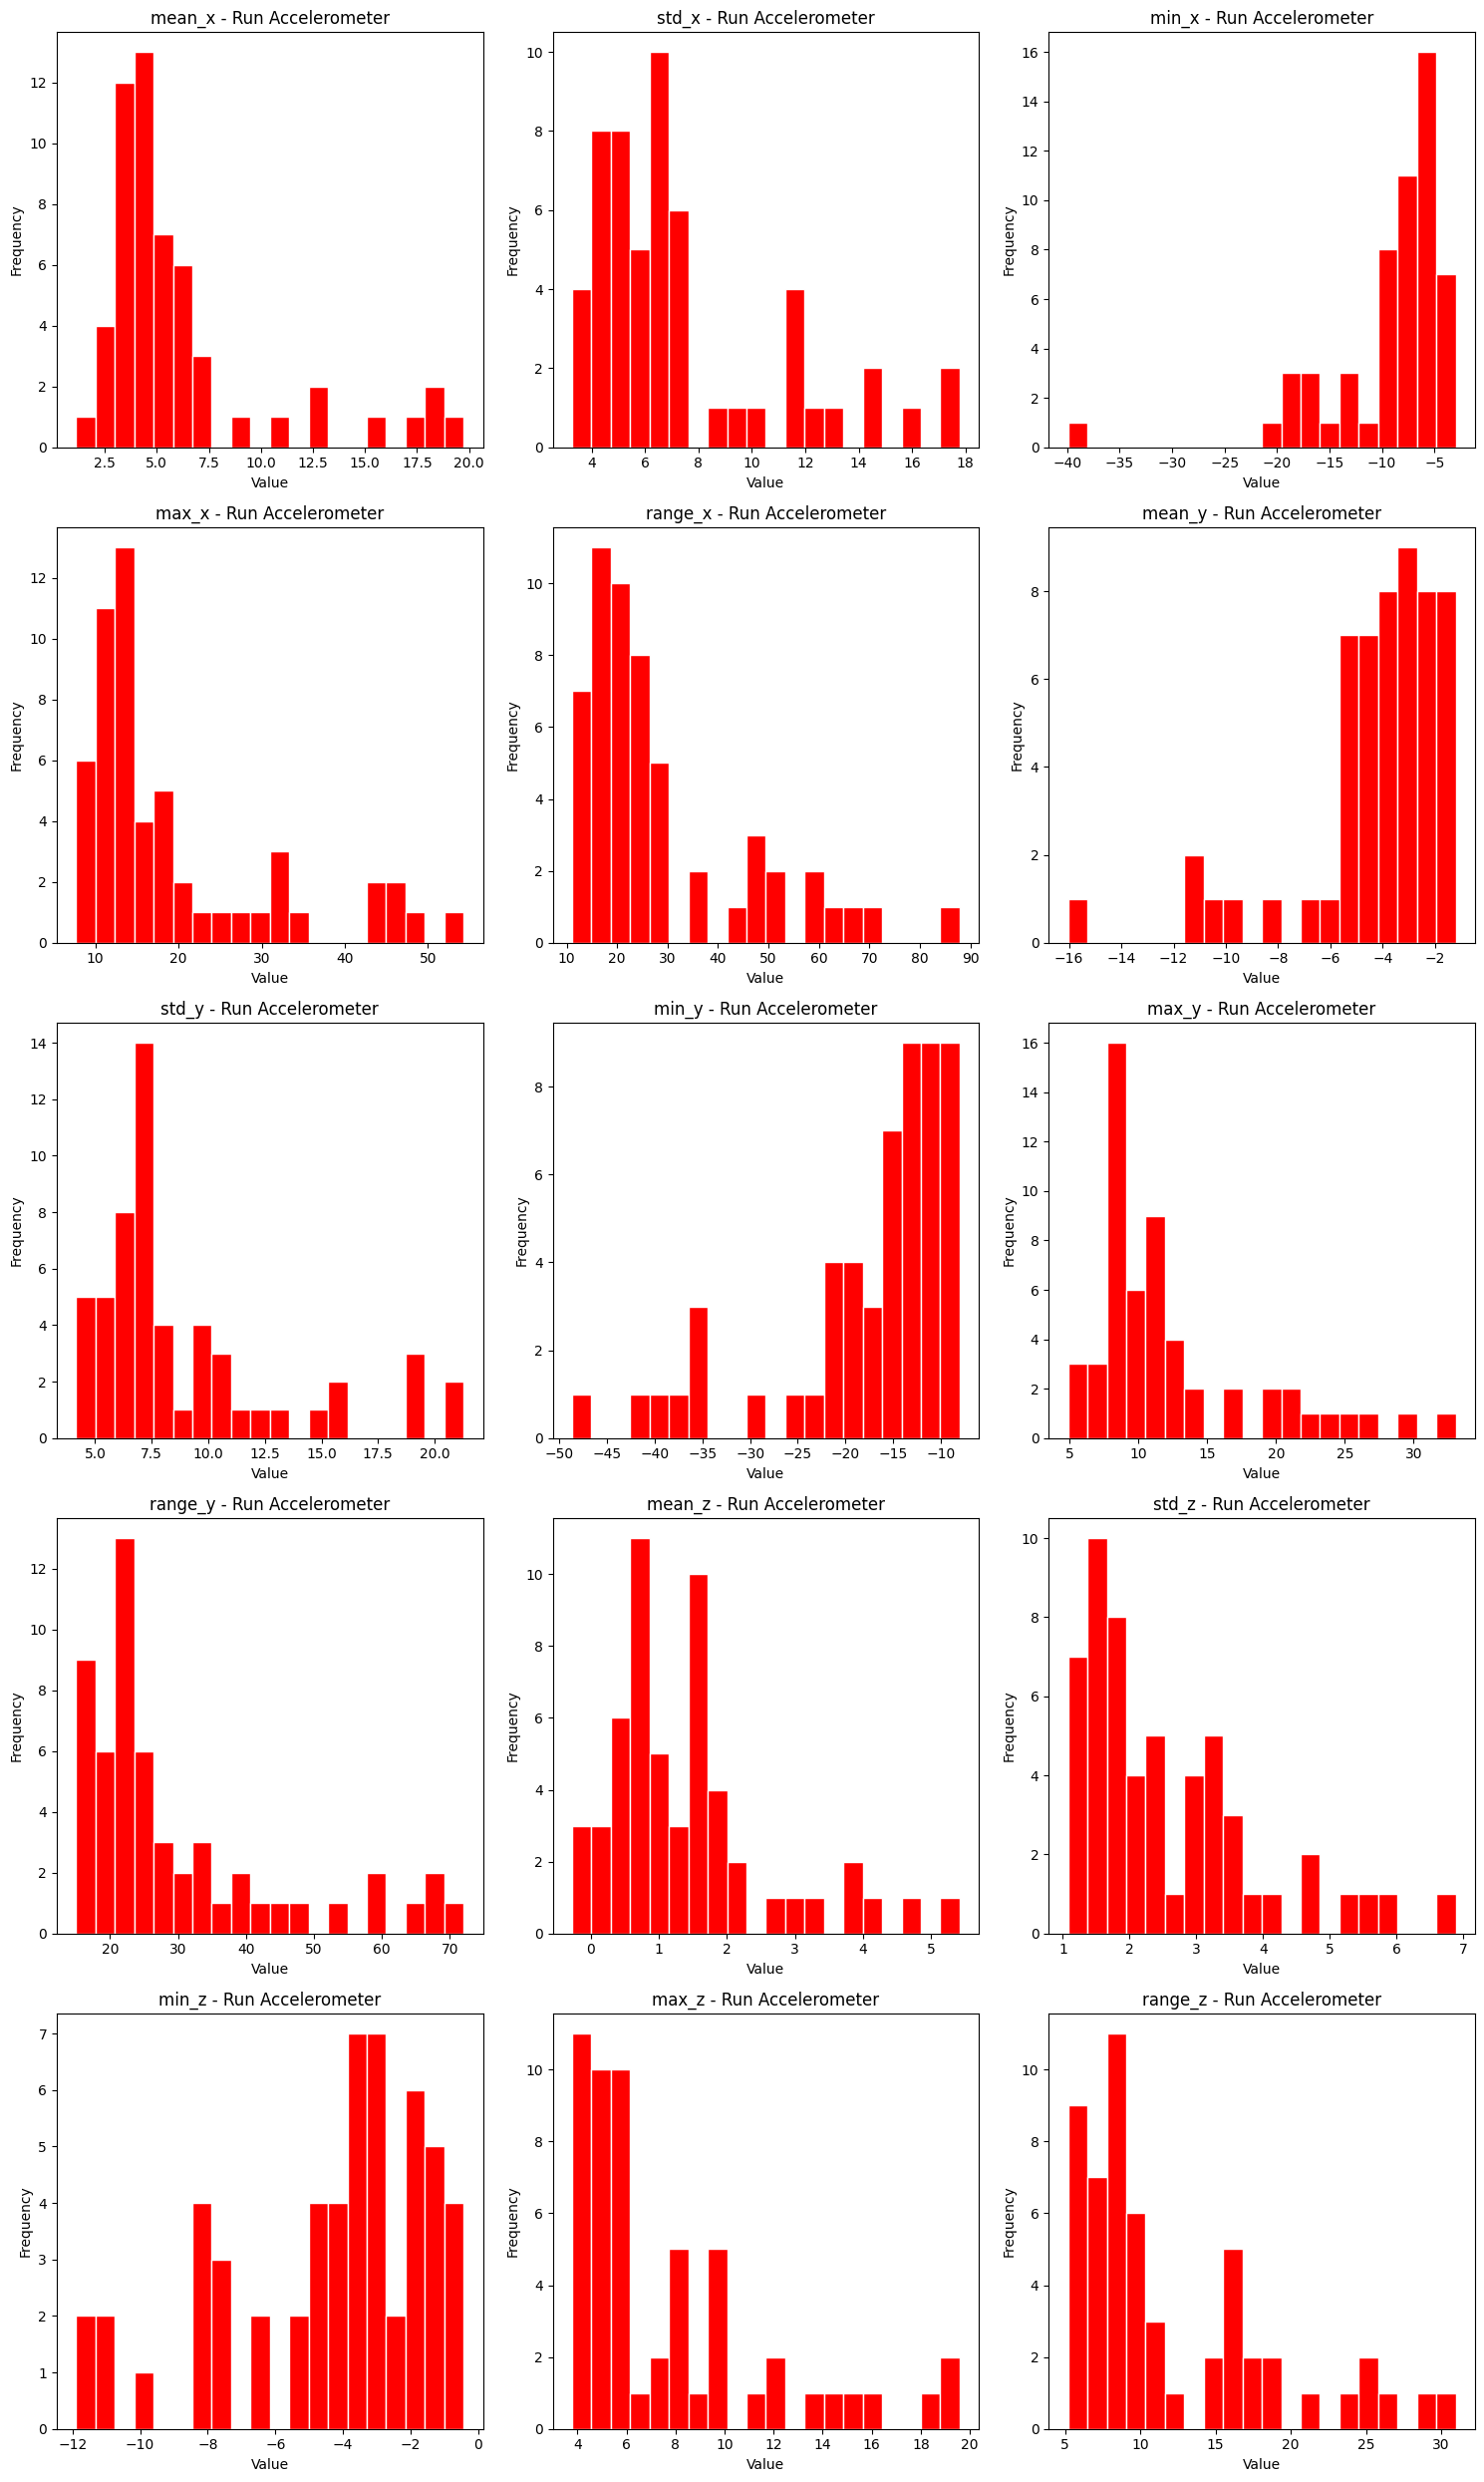

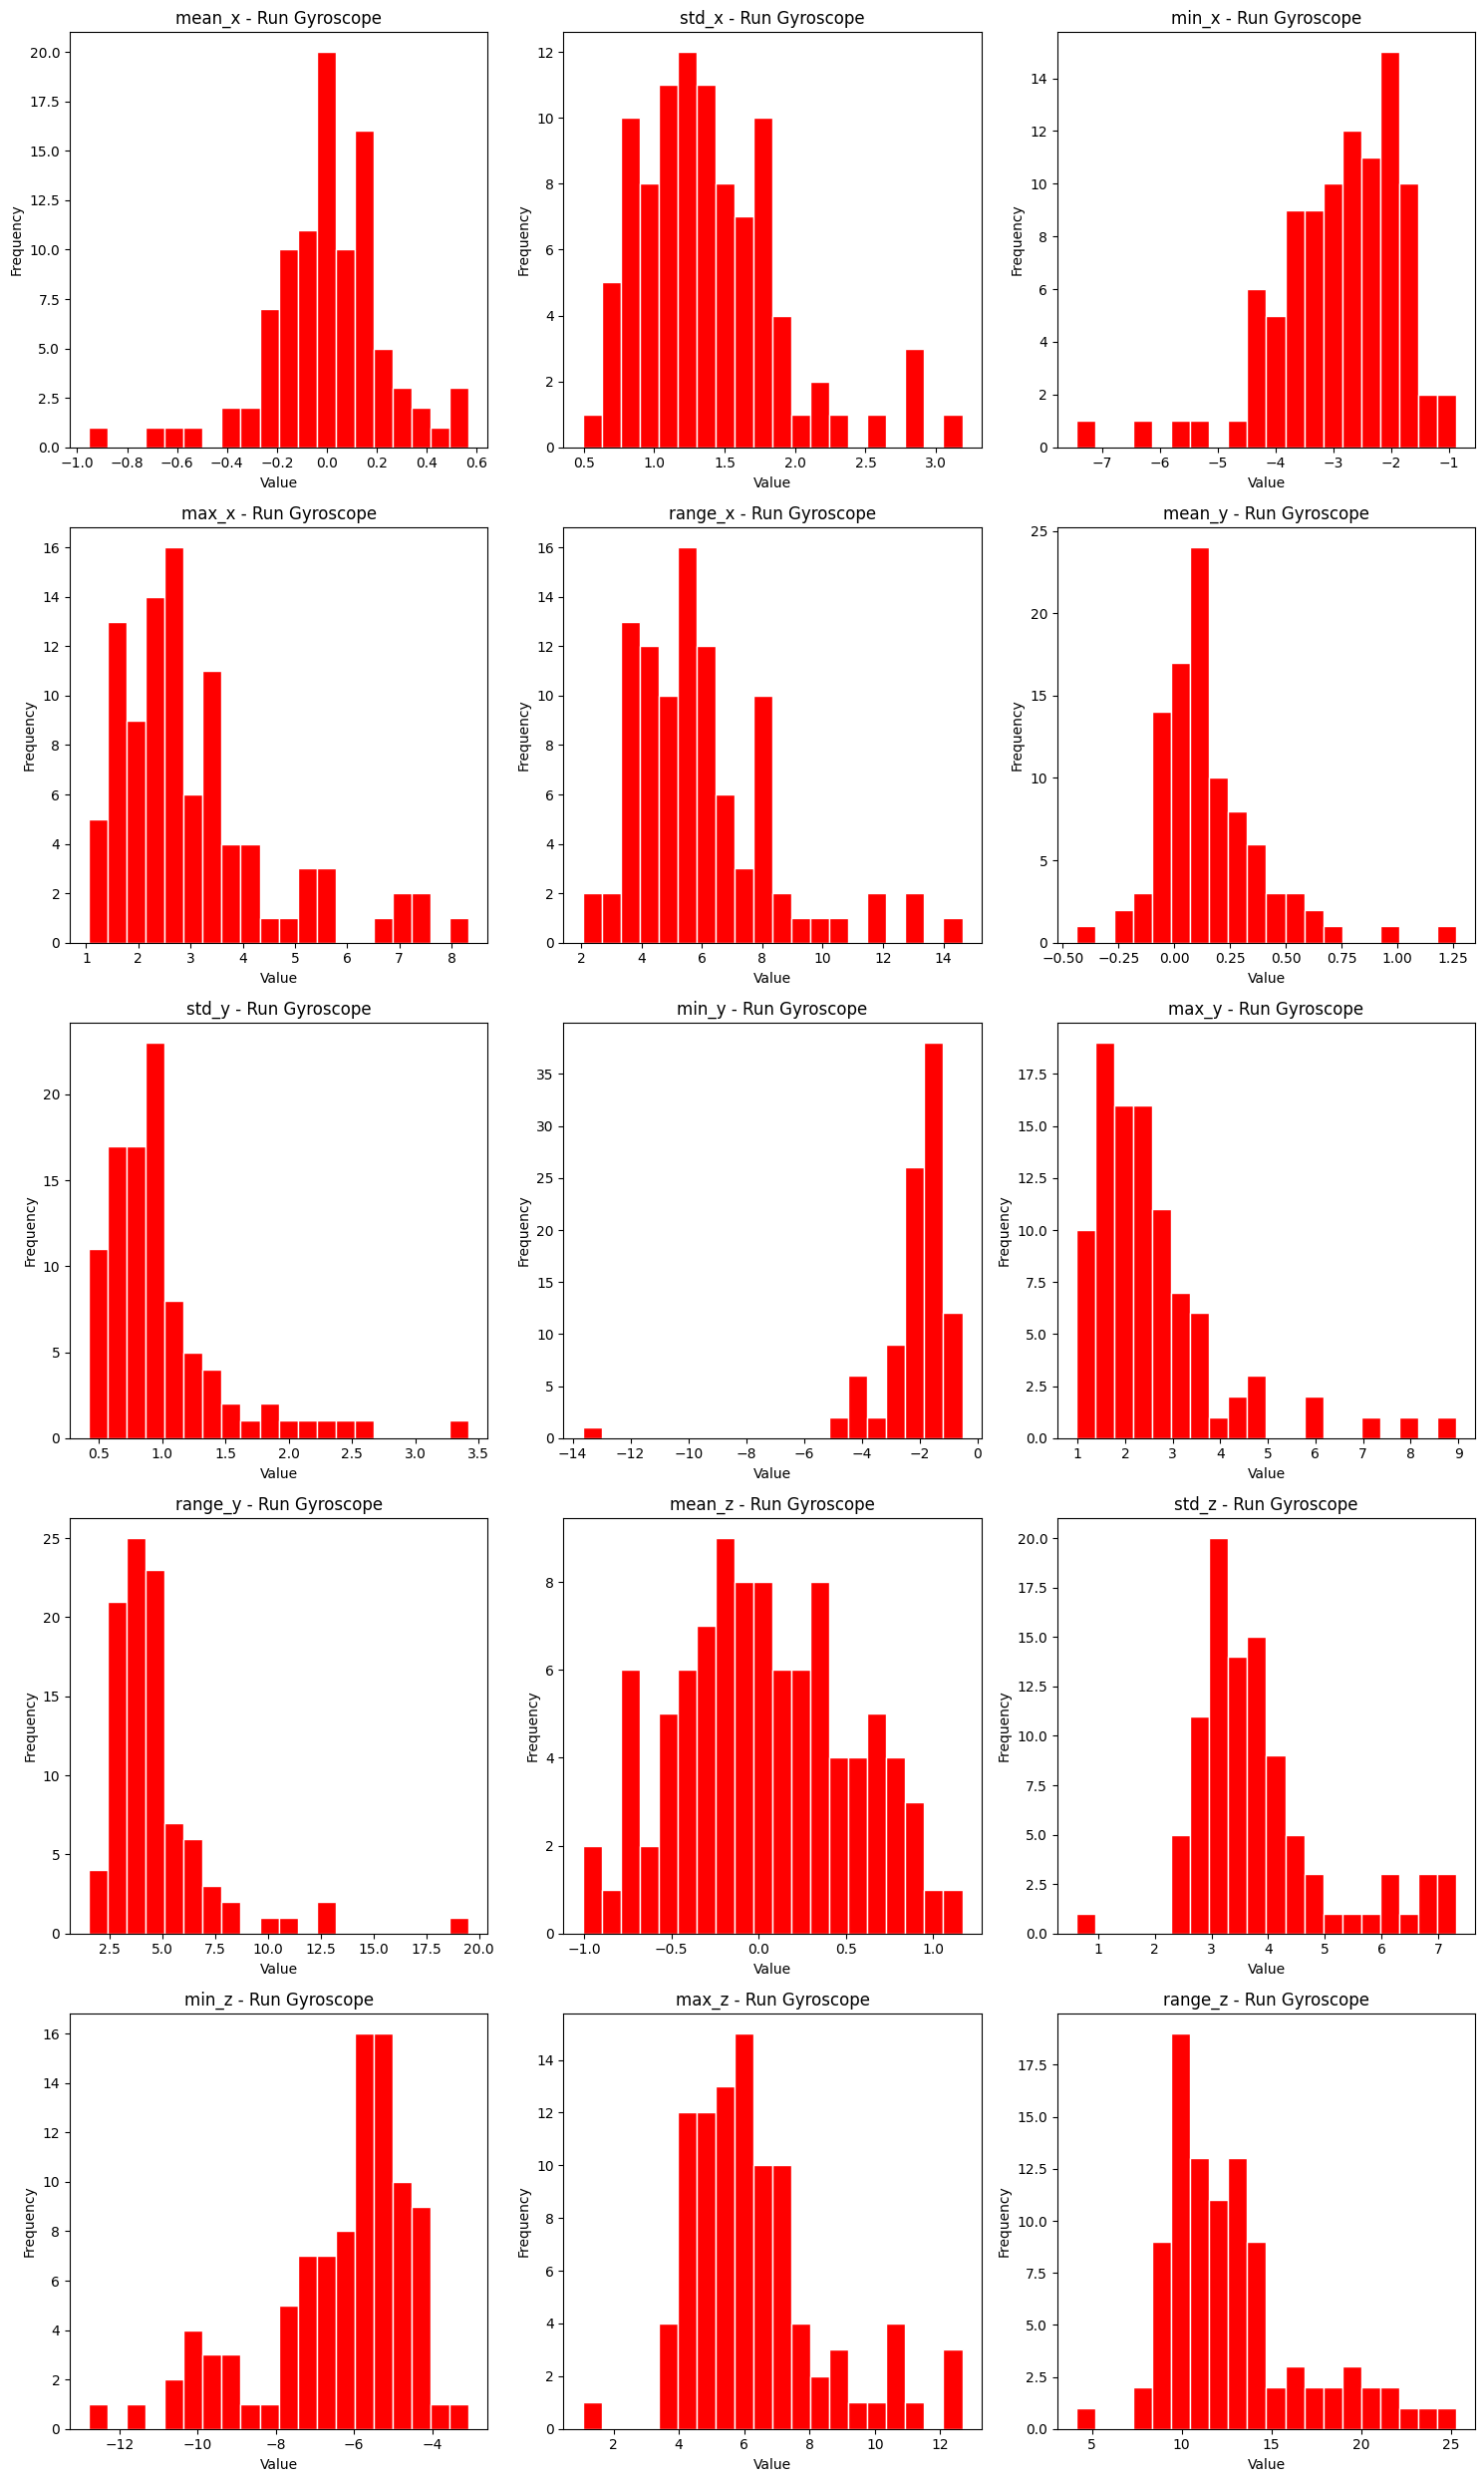

In [20]:

# Біг
plot_histograms(run_accel_statistics, "Run Accelerometer")
plot_histograms(run_gyro_statistics, "Run Gyroscope")



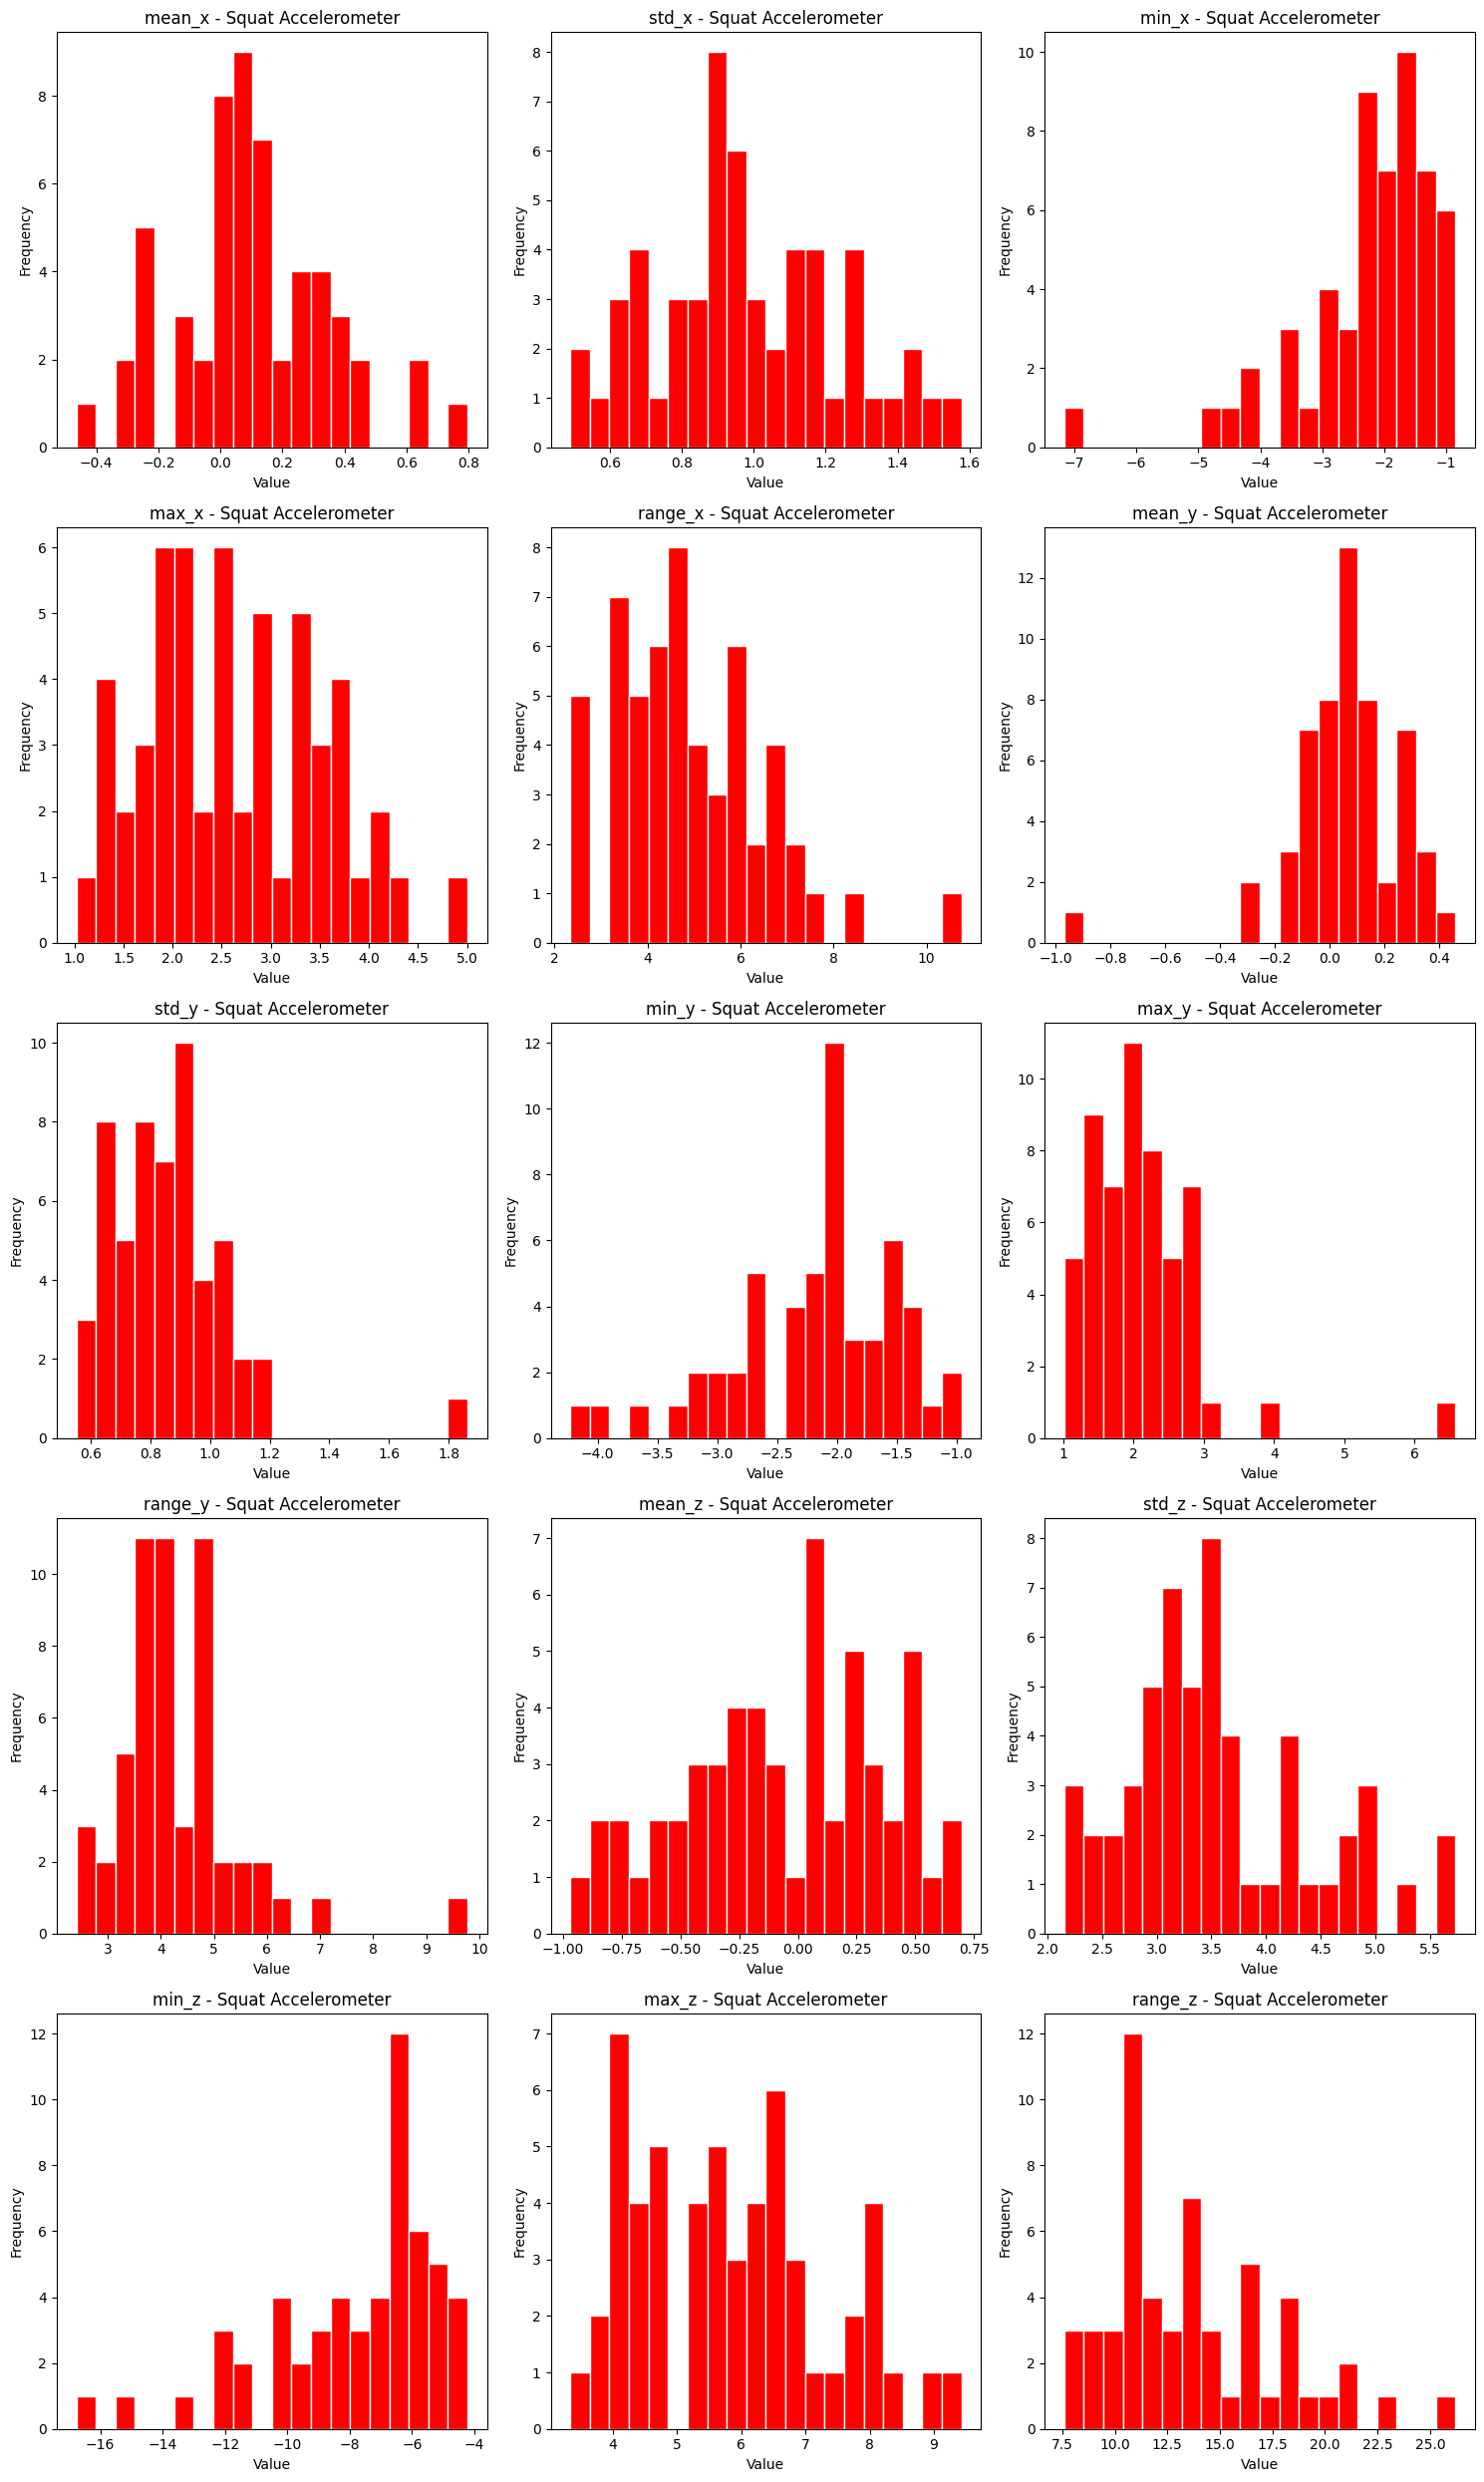

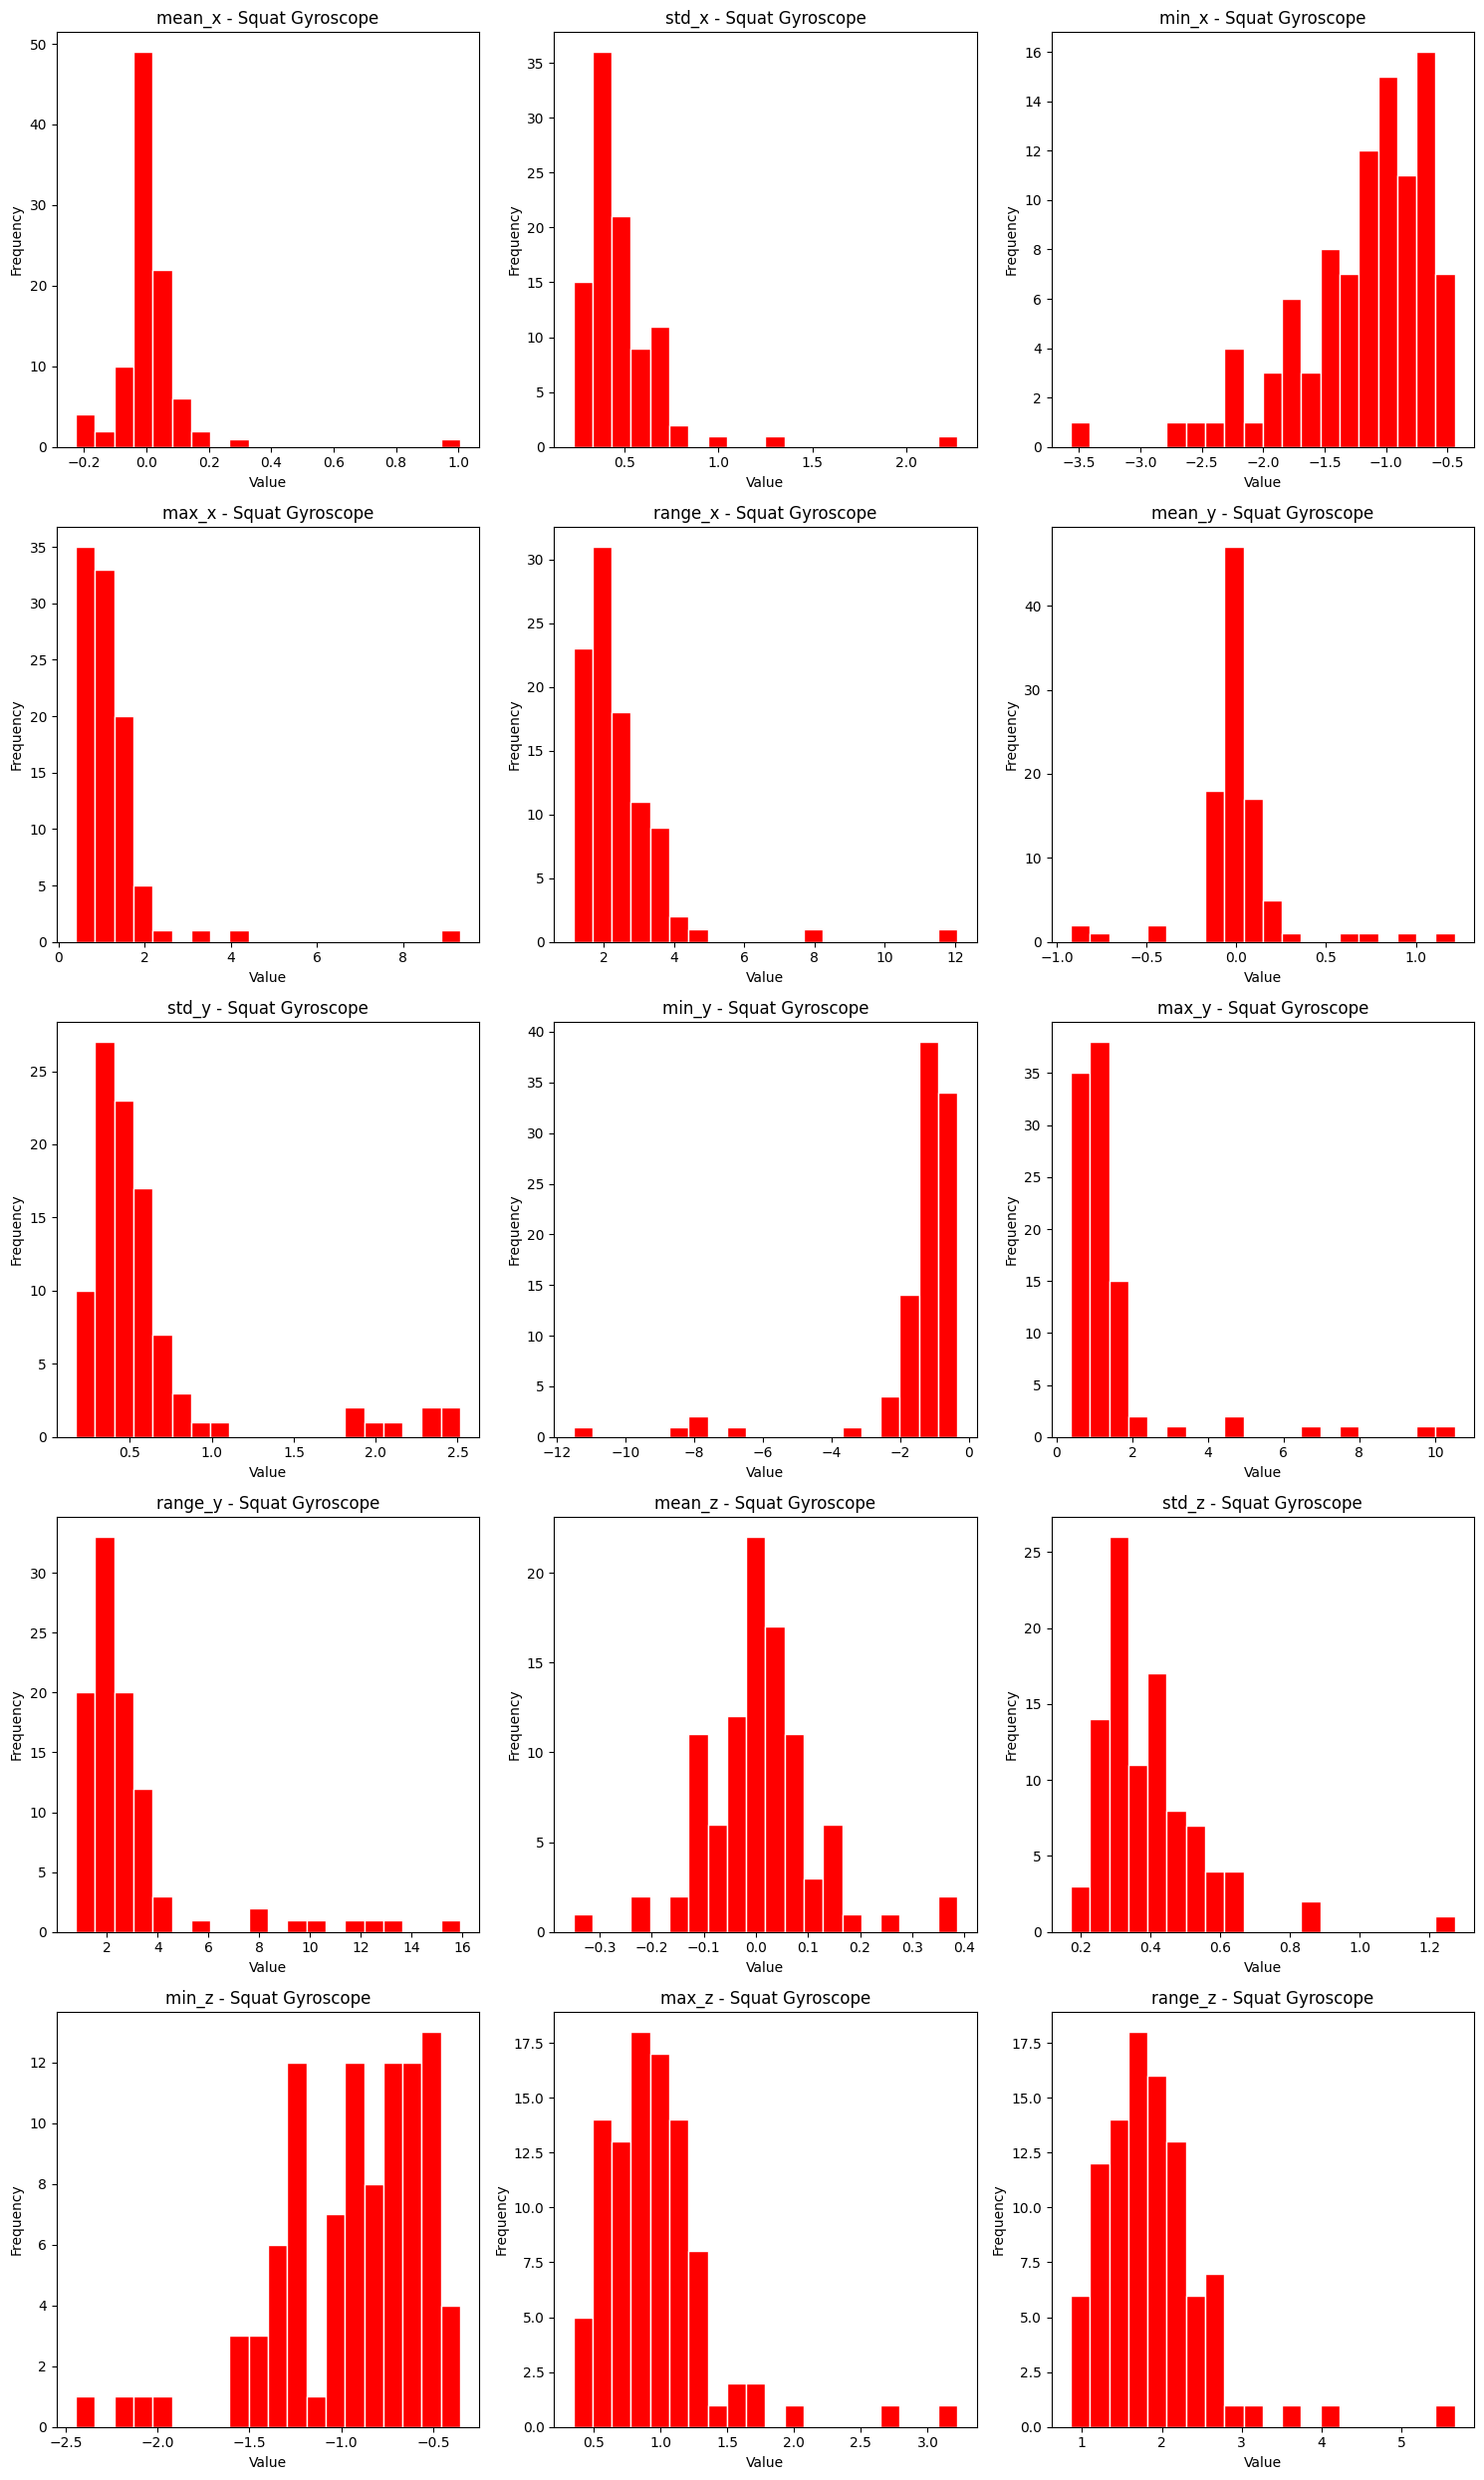

In [21]:

# Присідання
plot_histograms(squat_accel_statistics, "Squat Accelerometer")
plot_histograms(squat_gyro_statistics, "Squat Gyroscope")

In [ ]:
def params(data):
    mean = data.mean()
    std_dev = data.std()
    minimum = data.min()
    maximum = data.max()
    diff = maximum - minimum
    return mean, std_dev, minimum, maximum, diff

activities_data = {
    'walk': {'accel': walk_accel_data, 'gyro': walk_gyro_data},
    'run': {'accel': run_accel_data, 'gyro': run_gyro_data},
    'squat': {'accel': squat_accel_data, 'gyro': squat_gyro_data}
}

for activity, data in activities_data.items():
    print(f"Stats for {activity} activity:")
    for sensor, sensor_data in data.items():
        print(f"Sensor: {sensor}")
        for axis in ['x', 'y', 'z']:
            axis_data = sensor_data[axis]
            mean, std_dev, minimum, maximum, diff = params(axis_data)
            print(f"Axis {axis}:")
            print(f"   Mean: {mean}")
            print(f"   Standard Deviation: {std_dev}")
            print(f"   Minimum: {minimum}")
            print(f"   Maximum: {maximum}")
            print(f"   Difference between max and min: {diff}")

Stats for walk activity:
Sensor: accel
Axis x:
   Mean: 0.23678746658709268
   Standard Deviation: 3.116427280987953
   Minimum: -7.478423118591309
   Maximum: 9.765373229980469
   Difference between max and min: 17.243796348571777
Axis y:
   Mean: -0.3614695884809915
   Standard Deviation: 2.5426098804916095
   Minimum: -8.061868667602539
   Maximum: 6.161384105682373
   Difference between max and min: 14.223252773284912
Axis z:
   Mean: -0.09514815395775389
   Standard Deviation: 1.3367461584289997
   Minimum: -8.541215896606445
   Maximum: 8.41671085357666
   Difference between max and min: 16.957926750183105
Sensor: gyro
Axis x:
   Mean: -0.007027325349269369
   Standard Deviation: 0.6462572297082131
   Minimum: -2.713078022003174
   Maximum: 3.213896512985229
   Difference between max and min: 5.926974534988403
Axis y:
   Mean: -0.01886853412961224
   Standard Deviation: 0.7845818466962434
   Minimum: -8.092657089233398
   Maximum: 5.519310474395752
   Difference between max and m

In [ ]:
# Функція для класифікації фізичної активності
def classify_activity(accel_data, gyro_data):
    # Для акселерометра
    accel_x_mean = accel_data['x'].mean()
    accel_y_mean = accel_data['y'].mean()
    accel_z_mean = accel_data['z'].mean()
    accel_x_std_dev = accel_data['x'].std()
    accel_y_std_dev = accel_data['y'].std()
    accel_z_std_dev = accel_data['z'].std()
    accel_x_diff = accel_data['x'].max() - accel_data['x'].min()
    accel_y_diff = accel_data['y'].max() - accel_data['y'].min()
    accel_z_diff = accel_data['z'].max() - accel_data['z'].min()

    # Для гіроскопа
    gyro_x_mean = gyro_data['x'].mean()
    gyro_y_mean = gyro_data['y'].mean()
    gyro_z_mean = gyro_data['z'].mean()
    gyro_x_std_dev = gyro_data['x'].std()
    gyro_y_std_dev = gyro_data['y'].std()
    gyro_z_std_dev = gyro_data['z'].std()
    gyro_x_diff = gyro_data['x'].max() - gyro_data['x'].min()
    gyro_y_diff = gyro_data['y'].max() - gyro_data['y'].min()
    gyro_z_diff = gyro_data['z'].max() - gyro_data['z'].min()

    if (4 < accel_x_mean < 7 and -5 < accel_y_mean < 0 and 0 < accel_z_mean < 2
            and accel_x_std_dev < 10 and accel_y_std_dev < 11 and accel_z_std_dev < 4
            and accel_x_diff < 95 and accel_y_diff < 82 and accel_z_diff < 32
            and -1 < gyro_x_mean < 0 and 0 < gyro_y_mean < 0.5 and -1 < gyro_z_mean < 1
            and gyro_x_std_dev < 2 and gyro_y_std_dev < 2 and gyro_z_std_dev < 5
            and gyro_x_diff < 16 and gyro_y_diff < 23 and gyro_z_diff < 26):
        return 'run'
    elif (0 < accel_x_mean < 0.4 and -0.5 < accel_y_mean < 0.5 and -0.2 < accel_z_mean < 0.2
          and accel_x_std_dev < 4 and accel_y_std_dev < 3 and accel_z_std_dev < 2
          and accel_x_diff < 20 and accel_y_diff < 15 and accel_z_diff < 17
          and -0.05 < gyro_x_mean < 0.05 and -0.05 < gyro_y_mean < 0.05 and -0.05 < gyro_z_mean < 0.05
          and gyro_x_std_dev < 0.7 and gyro_y_std_dev < 0.8 and gyro_z_std_dev < 1.1
          and gyro_x_diff < 6 and gyro_y_diff < 14 and gyro_z_diff < 10):
        return 'walk'
    elif (0.095 < accel_x_mean < 0.12 and 0.055 < accel_y_mean < 0.07 and -0.08 < accel_z_mean < -0.06
      and accel_x_std_dev < 1.5 and accel_y_std_dev < 1.5 and accel_z_std_dev < 4
      and accel_x_diff < 13 and accel_y_diff < 13 and accel_z_diff < 27):
        return 'squat'
    else:
        return 'other activity'
    
for activity, data in activities_data.items():
    print(f"Stats for {activity} activity:")
    accel_data = data['accel']
    gyro_data = data['gyro']
    classification = classify_activity(accel_data, gyro_data)  # Визначення класу
    print(f"Activity: {classification}\n")

Stats for walk activity:
Activity: walk

Stats for run activity:
Activity: run

Stats for squat activity:
Activity: squat

